In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [21]:
df = pd.read_csv("Scarpe_Sportive.csv", encoding='utf-8')

In [23]:
df

,categoria,taglia,genere,marca,nome_prodotto,prezzo_effettivo,prezzo_ordinario,url_prodotto,modello,sport,colori
0,Scarpe Sportive,35.5,uomo,PUMA,MORPHIC - Scarpe da corsa su strada - white-wa...,47.95,80.00,https://www.zalando.it/puma-morphic-sneakers-b...,MORPHIC,scarpe da corsa su strada,white-warm white-sun struck
1,Scarpe Sportive,35.5,uomo,PUMA,PROSPECT UNISEX - Scarpe da allenamento - blac...,48.95,70.00,https://www.zalando.it/puma-prospect-unisex-sc...,PROSPECT UNISEX,scarpe da allenamento,black/yellow alert/white
2,Scarpe Sportive,35.5,uomo,PUMA,PWR HYBRID TR UNISEX - Scarpe da allenamento -...,63.95,80.00,https://www.zalando.it/puma-pwr-hybrid-tr-unis...,PWR HYBRID TR UNISEX,scarpe da allenamento,black- white- black
3,Scarpe Sportive,35.5,uomo,UNDER ARMOUR,JET '23 - Scarpe da basket - black,60.00,60.00,https://www.zalando.it/under-armour-court-perf...,JET '23,scarpe da basket,black
4,Scarpe Sportive,35.5,uomo,PUMA,ELIMINATE TURBO - Scarpe da pallamano - white/...,101.99,119.99,https://www.zalando.it/puma-eliminate-turbo-sc...,ELIMINATE TURBO,scarpe da pallamano,white/bluemazing
...,...,...,...,...,...,...,...,...,...,...,...
15284,Scarpe Sportive,47.0,donna,UNDER ARMOUR,Scarpe da corsa su strada - white,130.00,130.00,https://www.zalando.it/under-armour-scarpe-da-...,Unknown,scarpe da corsa su strada,white
15285,Scarpe Sportive,48.0,donna,PUMA,Scarpe da allenamento - white/black,89.99,89.99,https://www.zalando.it/puma-unisex-scarpe-da-p...,Unknown,scarpe da allenamento,white/black
15286,Scarpe Sportive,48.0,donna,PUMA,Scarpe da allenamento - sun stream black caram...,89.99,89.99,https://www.zalando.it/puma-scarpe-da-allename...,Unknown,scarpe da allenamento,sun stream black caramel latte
15287,Scarpe Sportive,48.0,donna,PUMA,Scarpe da allenamento - black/white,89.99,89.99,https://www.zalando.it/puma-scarpe-da-pallaman...,Unknown,scarpe da allenamento,black/white


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15289 entries, 0 to 15288
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   categoria         15289 non-null  object 
 1   taglia            15289 non-null  float64
 2   genere            15289 non-null  object 
 3   marca             15289 non-null  object 
 4   nome_prodotto     15289 non-null  object 
 5   prezzo_effettivo  15289 non-null  float64
 6   prezzo_ordinario  15289 non-null  float64
 7   url_prodotto      15289 non-null  object 
 8   modello           15289 non-null  object 
 9   sport             15289 non-null  object 
 10  colori            15289 non-null  object 
dtypes: float64(3), object(8)
memory usage: 1.3+ MB


In [42]:
print("Statistiche descriptive di base:")
print(df.describe())

Statistiche descriptive di base:
             taglia  prezzo_effettivo  prezzo_ordinario
count  15289.000000      15289.000000      15289.000000
mean      41.551279        107.490073        118.662370
std        3.244751         46.072742         45.582036
min       35.000000         22.000000         22.950000
25%       39.500000         68.950000         79.990000
50%       41.500000        100.000000        119.990000
75%       43.000000        139.990000        149.990000
max       52.500000        255.000000        299.950000


In [44]:
print("\nValori Unici per Colonne Categoriche:")
for col in ['marca', 'categoria', 'taglia', 'genere', 'modello', 'sport']:
    print(f"{col}: {df[col].nunique()} valori unici")


Valori Unici per Colonne Categoriche:
marca: 8 valori unici
categoria: 1 valori unici
taglia: 34 valori unici
genere: 3 valori unici
modello: 619 valori unici
sport: 21 valori unici


### Analisi della distribuzione delle marche

In [64]:
# contare quanti dati offre ogni marca per avere un'idea della loro distribuzione
marca_somma = df['marca'].value_counts()
print(f'Quanti dati abbiamo per ogni marca: {marca_somma}')

Quanti dati abbiamo per ogni marca: marca
PUMA            5017
ASICS           3608
NEW BALANCE     2405
UNDER ARMOUR    2385
MIZUNO          1107
JOMA             471
PUMA GOLF        235
DIADORA           61
Name: count, dtype: int64


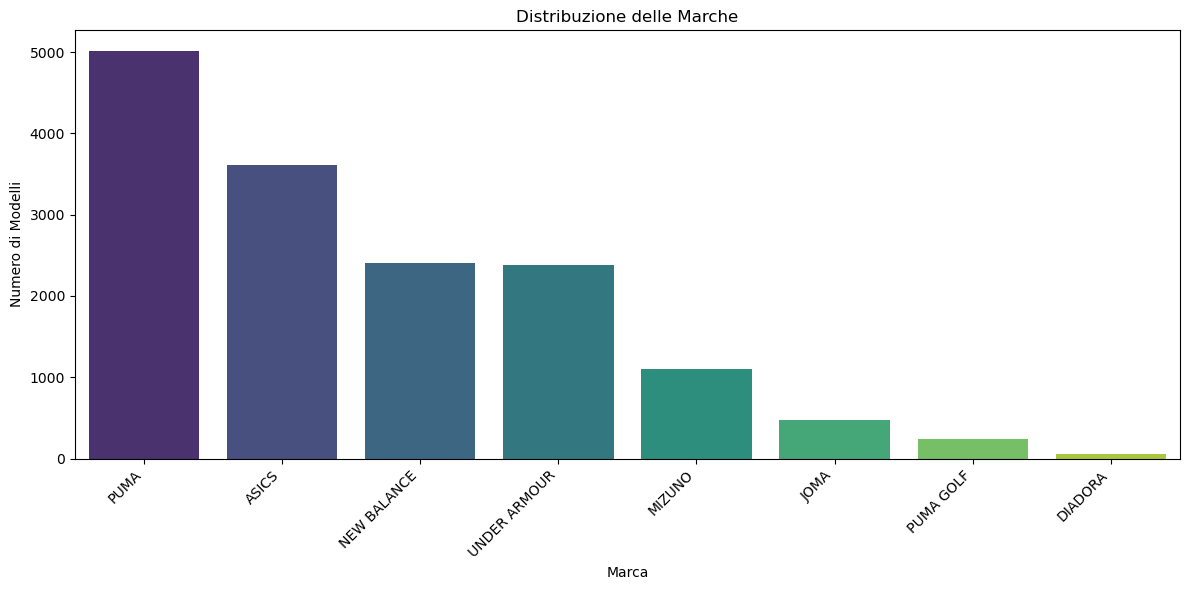

In [118]:
plt.figure(figsize=(12, 6))
sns.barplot(x=marca_somma.index, y=marca_somma.values, hue=marca_somma.index, palette="viridis", legend=False)

plt.title('Distribuzione delle Marche')

plt.xlabel('Marca')
plt.ylabel('Numero di Modelli')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [98]:
sport_conteggio = df['sport'].value_counts()
print('\nNumero di modelli per categoria:')
print(sport_conteggio)


Numero di modelli per categoria:
sport
scarpe da corsa su strada                  4713
scarpe da allenamento                      1863
scarpe da calcetto con tacchetti           1686
scarpe da basket                           1312
scarpe da trail running                    1232
sneakers basse                             1018
scarpe da pallavolo                         737
scarpe da pallamano                         550
da tennis per terra battuta                 439
scarpe da tennis per tutte le superfici     398
scarpe da golf                              257
scarpe da calcetto                          242
scarpe da calcio con tacchetti              232
scarpe da padel                             217
scarpe da camminata                         186
ciabatte da mare                            109
scarpa da hiking                             39
scarpa da rugby                              32
scarponi da montagna                         19
stivali da neve                               7


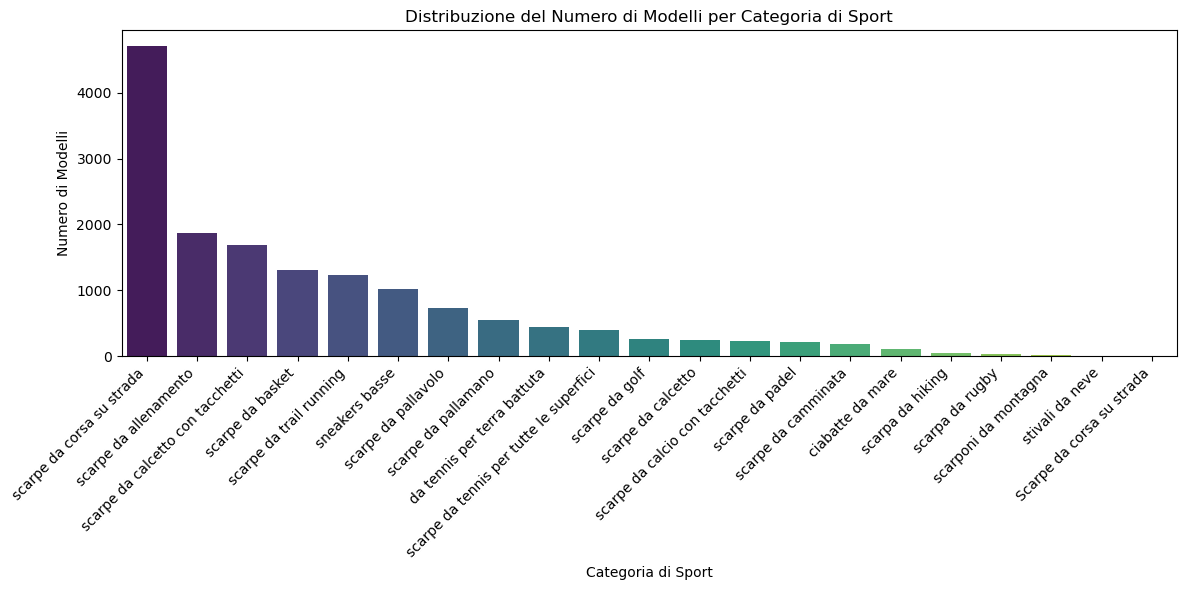

In [116]:
# prova visualizzazzione con un barplot
plt.figure(figsize=(12, 6))
sns.barplot(x=sport_conteggio.index, y=sport_conteggio.values, hue=sport_conteggio.index, palette="viridis", legend=False)
plt.title('Distribuzione del Numero di Modelli per Categoria di Sport')
plt.xlabel('Categoria di Sport')
plt.ylabel('Numero di Modelli')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Analisi della presenza del Brand sul sito Zalando


Numero di modelli offerti dal brand del committente: 1107

Numero di modelli offerti da ciascuna marca:
marca
PUMA            5017
ASICS           3608
NEW BALANCE     2405
UNDER ARMOUR    2385
MIZUNO          1107
JOMA             471
PUMA GOLF        235
DIADORA           61
Name: count, dtype: int64


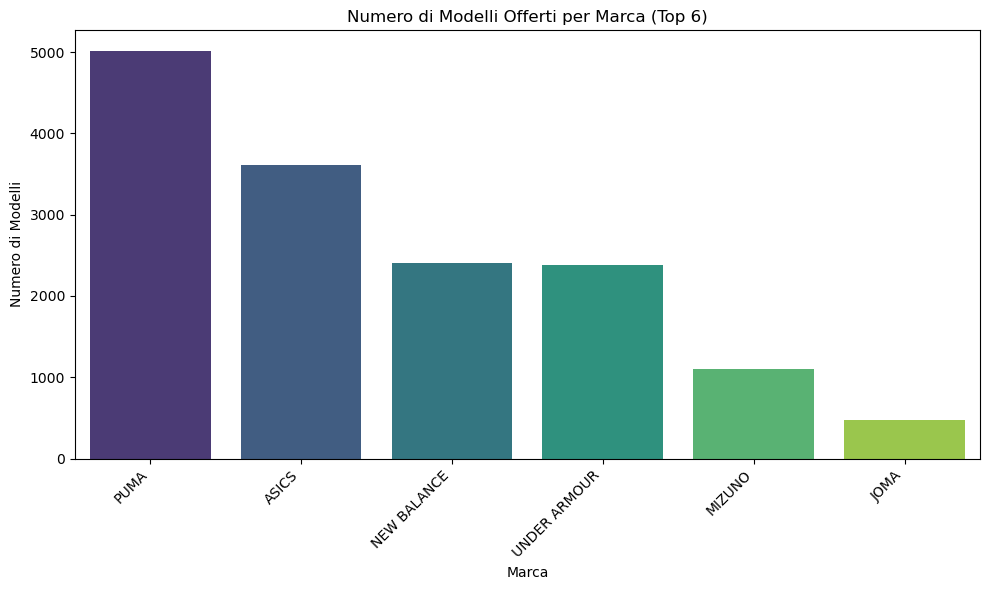

In [131]:
brand = 'MIZUNO'

# Numero totale di modelli offerti dal brand del committente
num_modelli = len(df[df['marca'] == brand])
print(f"\nNumero di modelli offerti dal brand del committente: {num_modelli}")

# Confronto con i competitor (numero di modelli per marca)
modelli_per_marca = df['marca'].value_counts()
print("\nNumero di modelli offerti da ciascuna marca:")
print(modelli_per_marca)

# Visualizzazione del confronto (top competitor)
top_n_marche = modelli_per_marca.nlargest(6) # Include il brand del committente e i 5 competitor principali
plt.figure(figsize=(10, 6))
sns.barplot(x=top_n_marche.index, y=top_n_marche.values, hue=top_n_marche.index, palette="viridis", legend=False)
plt.title('Numero di Modelli Offerti per Marca (Top 6)')
plt.xlabel('Marca')
plt.ylabel('Numero di Modelli')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [143]:
# raggruppa i dati per categoria di sport
raggruppa_sport_marca = df.groupby(['sport', 'marca'])[['prezzo_effettivo', 'prezzo_ordinario']].sum()

In [145]:
raggruppa_sport_marca  = raggruppa_sport_marca .sort_values(by=["prezzo_effettivo", "prezzo_ordinario"])
raggruppa_sport_marca 

,,prezzo_effettivo,prezzo_ordinario
sport,marca,,
scarpe da trail running,JOMA,50.00,50.00
Scarpe da corsa su strada,UNDER ARMOUR,160.00,160.00
scarpe da corsa su strada,JOMA,238.65,238.65
scarpe da calcetto,DIADORA,364.95,364.95
scarpa da hiking,PUMA,414.75,550.00
...,...,...,...
scarpe da corsa su strada,PUMA,92676.81,110342.47
sneakers basse,NEW BALANCE,113662.38,113662.38
scarpe da corsa su strada,UNDER ARMOUR,117341.24,124461.90


### Analisi per categoria 'sport'

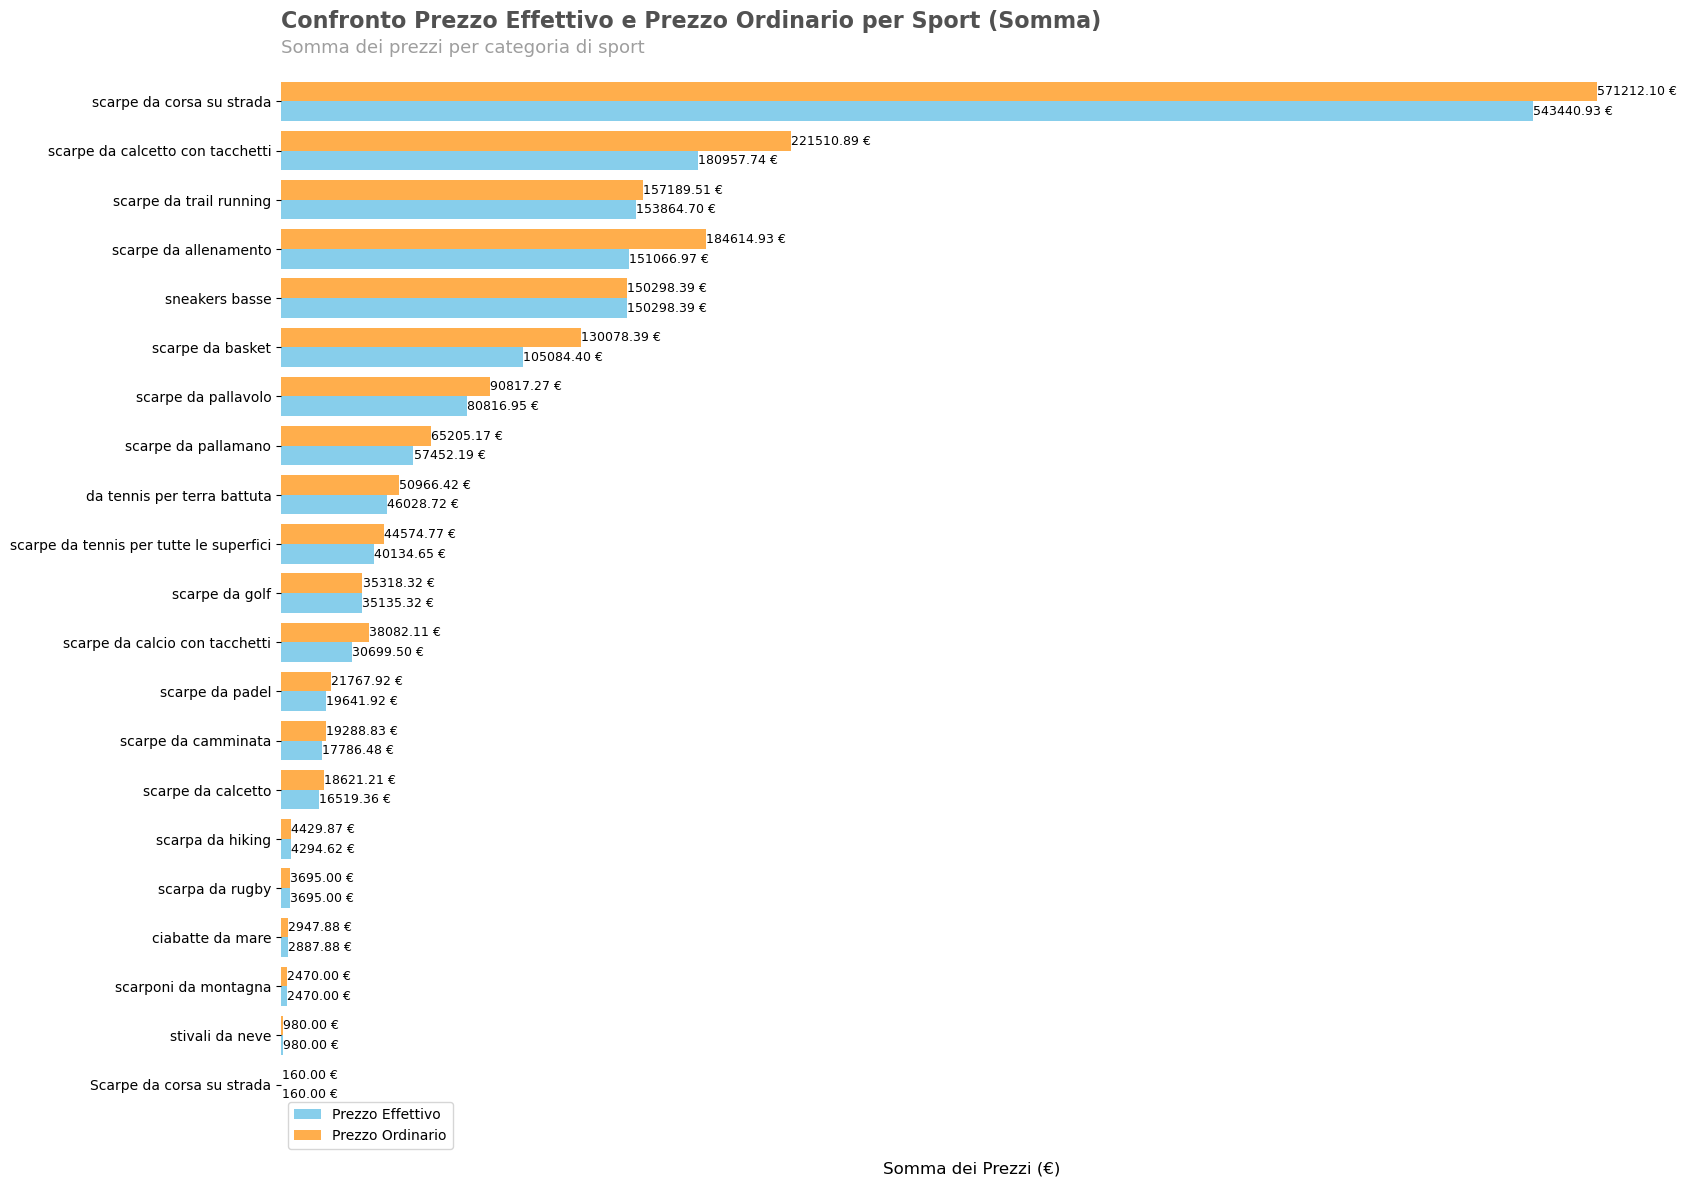

In [156]:
raggruppa_sport = df.groupby('sport')[['prezzo_effettivo', 'prezzo_ordinario']].sum()
raggruppa_sport = raggruppa_sport.sort_values(by=["prezzo_effettivo", "prezzo_ordinario"])

# settiamo il font come sans-serif
plt.rcParams['font.family'] = 'sans-serif'

# settiamo i colori
grey = "#9E9E9E"
grey_text = "#515151"
effective_color = "skyblue"
ordinary_color = "darkorange"

# andiamo a creare la figura e il subplot
fig, ax = plt.subplots(figsize=(17, 13))

# prendiamo il Data per il plot
sports = raggruppa_sport.index
effective_prices = raggruppa_sport['prezzo_effettivo']
ordinary_prices = raggruppa_sport['prezzo_ordinario']

bar_width = 0.4
y_positions = np.arange(len(sports))

ax.barh(y_positions - bar_width/2, effective_prices, height=bar_width, color=effective_color, label="Prezzo Effettivo")
ax.barh(y_positions + bar_width/2, ordinary_prices, height=bar_width, color=ordinary_color, label="Prezzo Ordinario", alpha=0.7)

# Rimozione dei bordi del grafico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Rimozione dei segni sull'asse x
ax.set_xticks(ticks=[])

# Imposta le didascalie dell'asse y
ax.set_yticks(y_positions)
ax.set_yticklabels(sports, fontsize=10)

# aggiungi il titolo
ax.text(-100, len(sports) - 0.5 + 1, 'Confronto Prezzo Effettivo e Prezzo Ordinario per Sport (Somma)', fontsize=16, color=grey_text, fontweight='bold') # Adjusted y position
ax.text(-100, len(sports) - 1 + 1, 'Somma dei prezzi per categoria di sport', fontsize=13, color=grey) # Adjusted y position

# aggiungi le etichette dei prezzi
for i, (effettivo, ordinario) in enumerate(zip(effective_prices, ordinary_prices)):
    ax.text(effettivo + 50, y_positions[i] - bar_width/2, f'{effettivo:.2f} €', va='center', ha='left', fontsize=9, color='black')
    ax.text(ordinario + 50, y_positions[i] + bar_width/2, f'{ordinario:.2f} €', va='center', ha='left', fontsize=9, color='black')

ax.set_xlabel("Somma dei Prezzi (€)", fontsize=12)
ax.legend(fontsize=10)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # aggiusta il layout
plt.show()

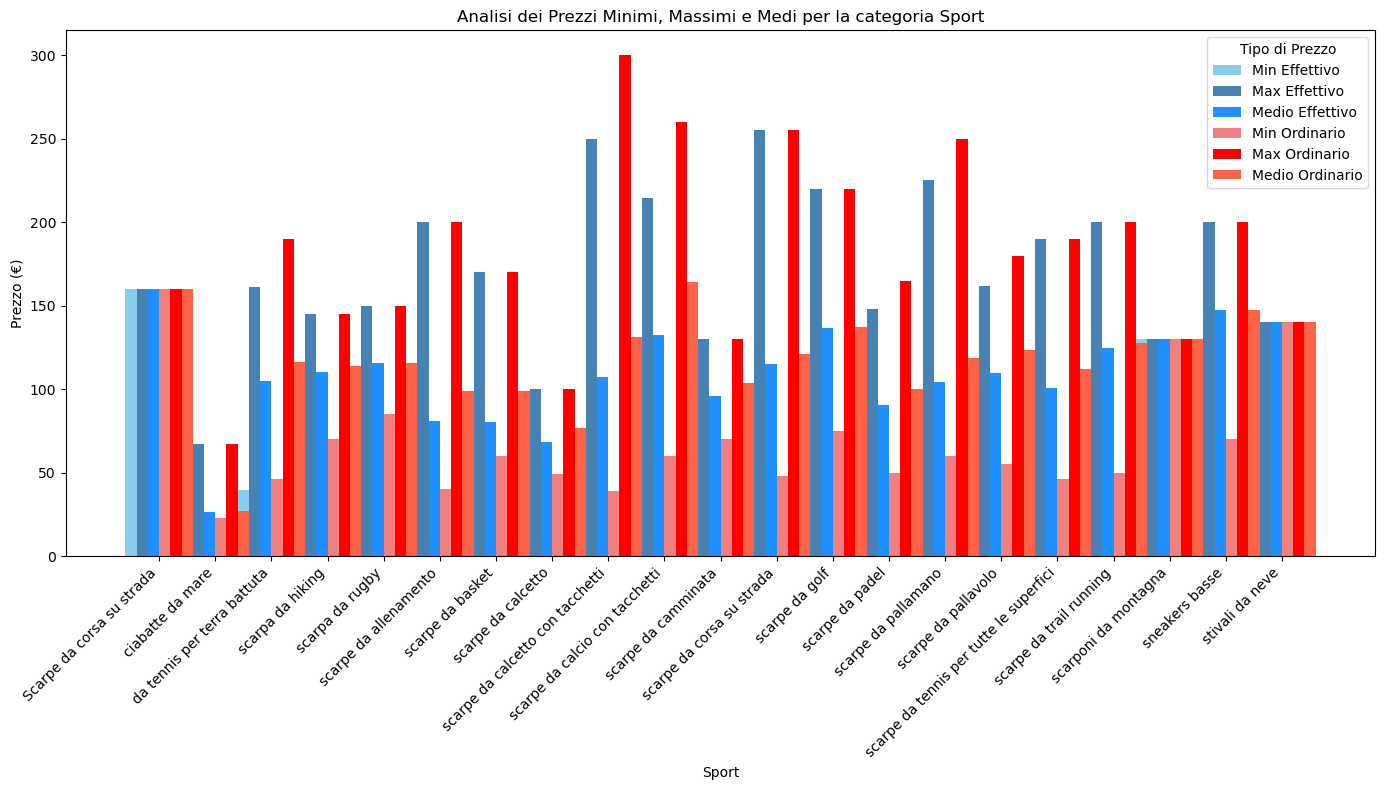

In [160]:
# Calcolo delle statistiche di prezzo per sport
prezzi_sport = df.groupby('sport').agg(
    prezzo_minimo_effettivo=('prezzo_effettivo', 'min'),
    prezzo_massimo_effettivo=('prezzo_effettivo', 'max'),
    prezzo_medio_effettivo=('prezzo_effettivo', 'mean'),
    prezzo_minimo_ordinario=('prezzo_ordinario', 'min'),
    prezzo_massimo_ordinario=('prezzo_ordinario', 'max'),
    prezzo_medio_ordinario=('prezzo_ordinario', 'mean')
).reset_index()

# Impostazione delle dimensioni del grafico
plt.figure(figsize=(14, 8))

# Larghezza delle barre
bar_width = 0.2

# Posizioni delle barre per ciascuna statistica di prezzo
pos_min_eff = np.arange(len(prezzi_sport))
pos_max_eff = [p + bar_width for p in pos_min_eff]
pos_med_eff = [p + bar_width * 2 for p in pos_min_eff]
pos_min_ord = [p + bar_width * 3 for p in pos_min_eff]
pos_max_ord = [p + bar_width * 4 for p in pos_min_eff]
pos_med_ord = [p + bar_width * 5 for p in pos_min_eff]

# Creazione delle barre per il prezzo effettivo
plt.bar(pos_min_eff, prezzi_sport['prezzo_minimo_effettivo'], bar_width, label='Min Effettivo', color='skyblue')
plt.bar(pos_max_eff, prezzi_sport['prezzo_massimo_effettivo'], bar_width, label='Max Effettivo', color='steelblue')
plt.bar(pos_med_eff, prezzi_sport['prezzo_medio_effettivo'], bar_width, label='Medio Effettivo', color='dodgerblue')

# Creazione delle barre per il prezzo ordinario
plt.bar(pos_min_ord, prezzi_sport['prezzo_minimo_ordinario'], bar_width, label='Min Ordinario', color='lightcoral')
plt.bar(pos_max_ord, prezzi_sport['prezzo_massimo_ordinario'], bar_width, label='Max Ordinario', color='red')
plt.bar(pos_med_ord, prezzi_sport['prezzo_medio_ordinario'], bar_width, label='Medio Ordinario', color='tomato')

# Aggiunta di etichette e titolo
plt.xlabel('Sport')
plt.ylabel('Prezzo (€)')
plt.title('Analisi dei Prezzi Minimi, Massimi e Medi per la categoria Sport')
plt.xticks(pos_min_eff + bar_width * 2.5, prezzi_sport['sport'], rotation=45, ha='right')
plt.legend(title='Tipo di Prezzo')
plt.tight_layout()
plt.show()

### Distribuzione del numero di prodotti per categoria di sport per vedere quali categorie sono piu presenti sul sito Zalando

In [167]:
# conteggio dei prodotti per categoria
conteggio = df.groupby('sport')['nome_prodotto'].count()
conteggio

sport
Scarpe da corsa su strada                     1
ciabatte da mare                            109
da tennis per terra battuta                 439
scarpa da hiking                             39
scarpa da rugby                              32
scarpe da allenamento                      1863
scarpe da basket                           1312
scarpe da calcetto                          242
scarpe da calcetto con tacchetti           1686
scarpe da calcio con tacchetti              232
scarpe da camminata                         186
scarpe da corsa su strada                  4713
scarpe da golf                              257
scarpe da padel                             217
scarpe da pallamano                         550
scarpe da pallavolo                         737
scarpe da tennis per tutte le superfici     398
scarpe da trail running                    1232
scarponi da montagna                         19
sneakers basse                             1018
stivali da neve                   

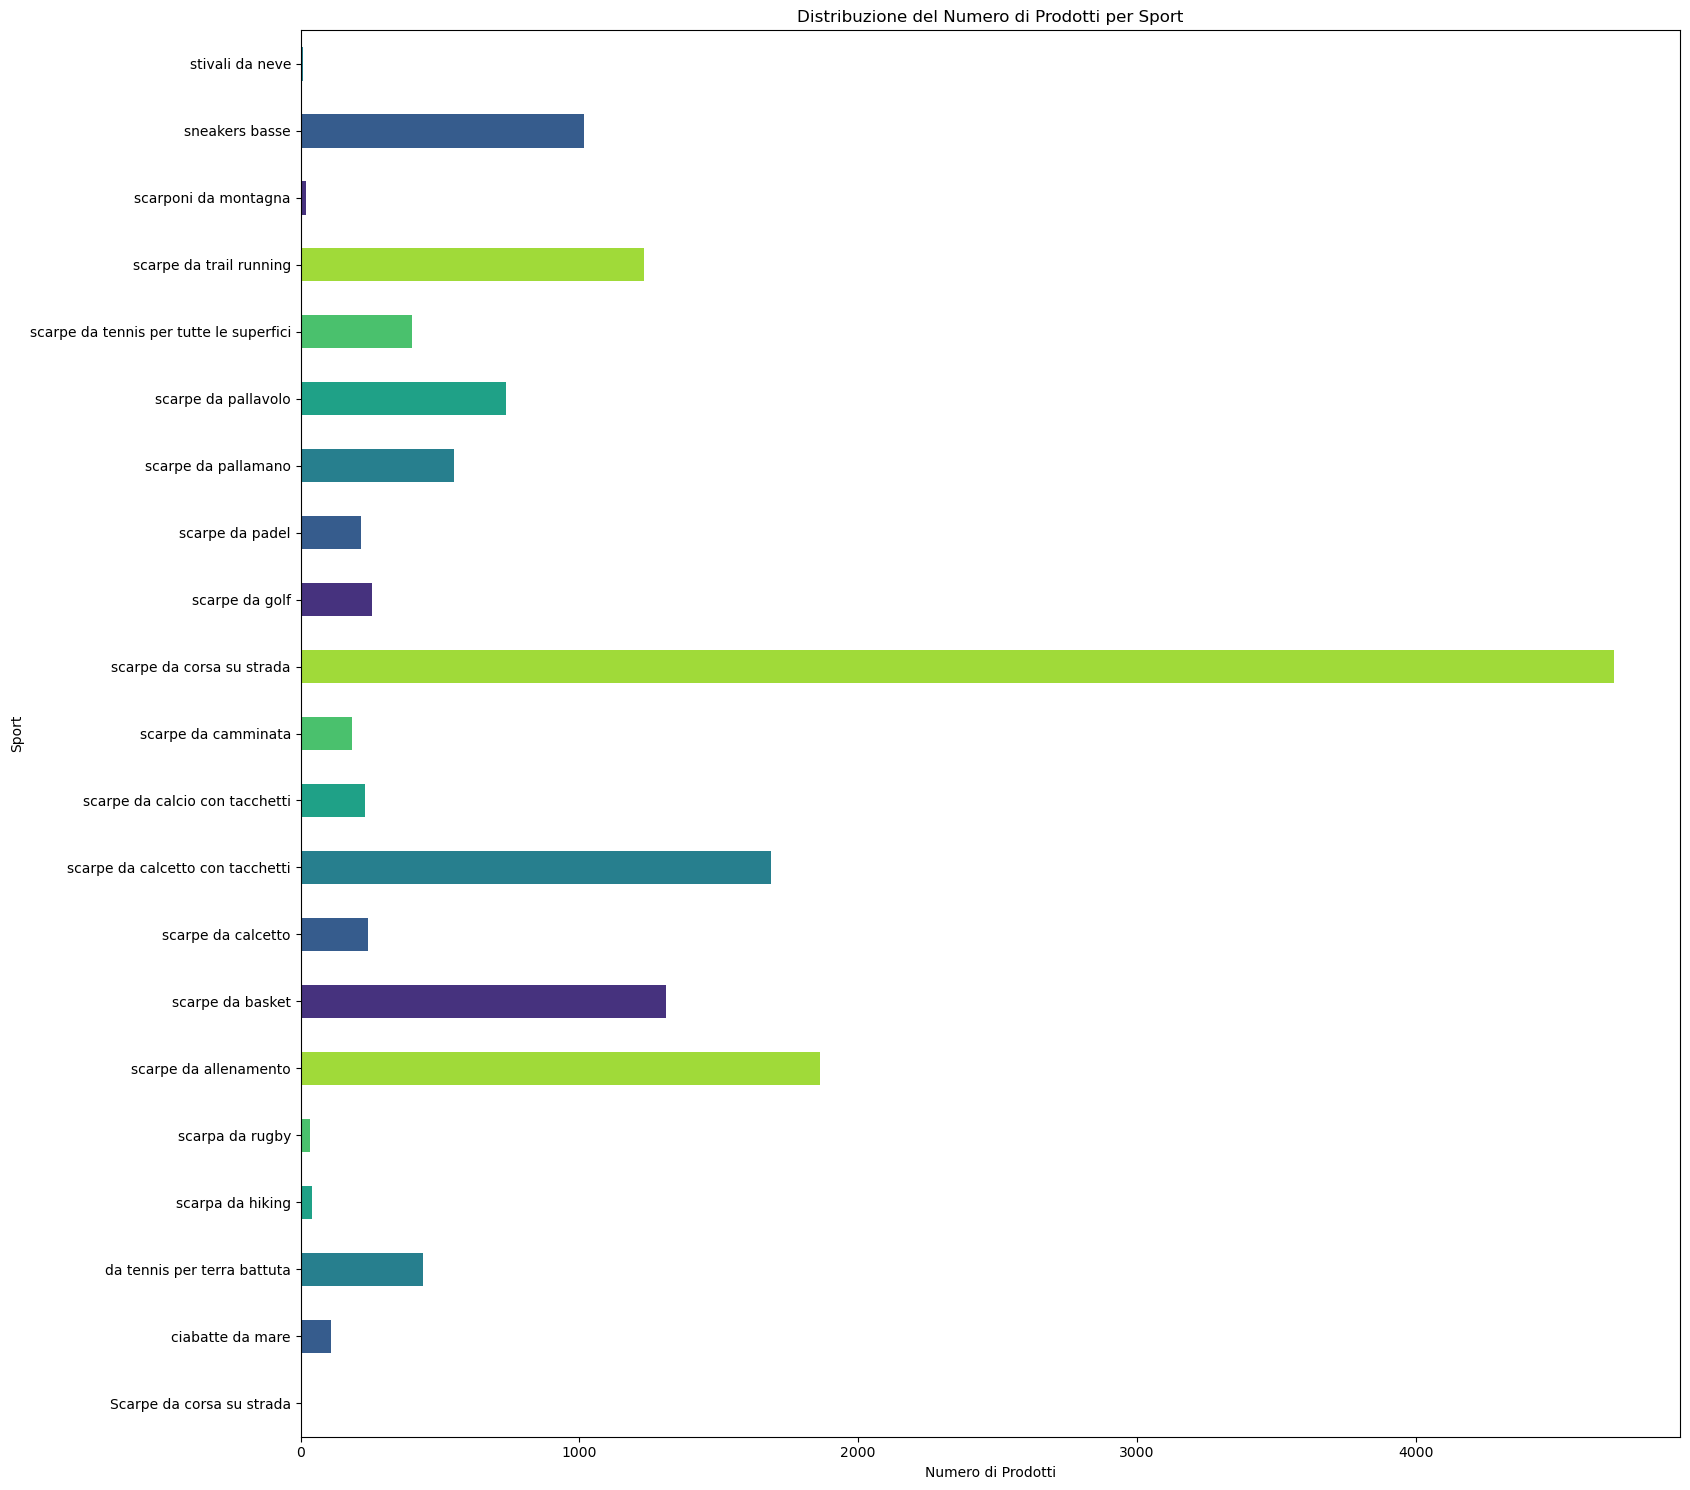

In [169]:
# Creazione del grafico a barre orizzontali
plt.figure(figsize=(17, 15))
conteggio.plot(kind='barh', color=sns.color_palette('viridis'))

# Aggiunta di etichette e titolo
plt.xlabel('Numero di Prodotti')
plt.ylabel('Sport')
plt.title('Distribuzione del Numero di Prodotti per Sport')

# Mostra il grafico
plt.tight_layout()
plt.show()

### Distribuzione dei prezzi per Categoria Sport in maniera tale che possiamo visualizzare e identificare eventuale categorie di Sport con prezzi variabili
### Abbiamo scelto di utilizzare un boxplot

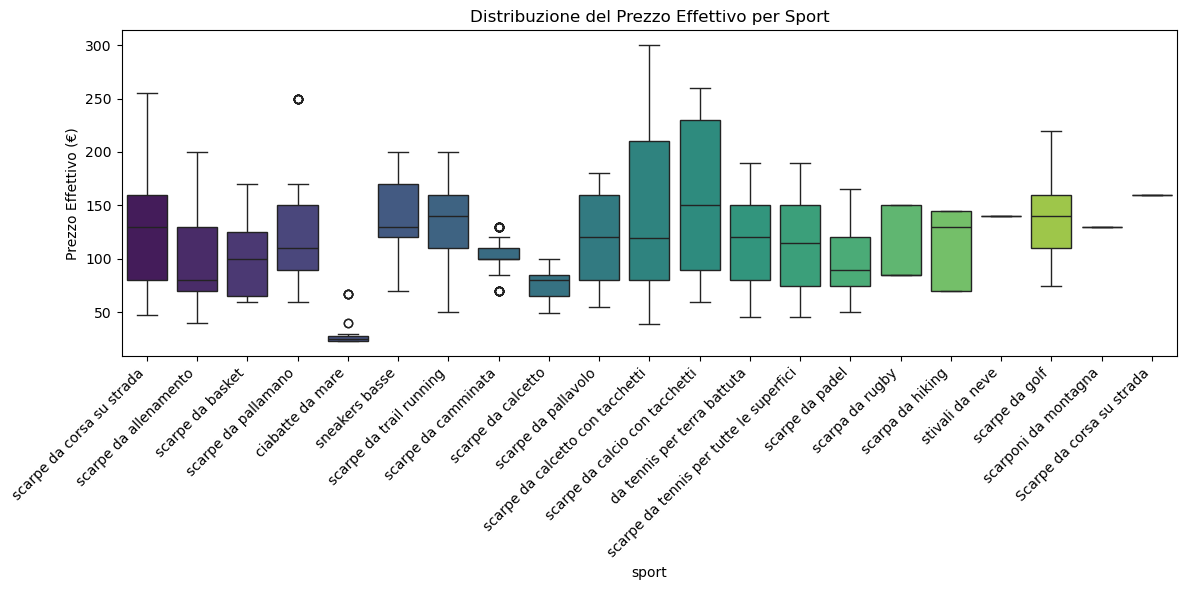

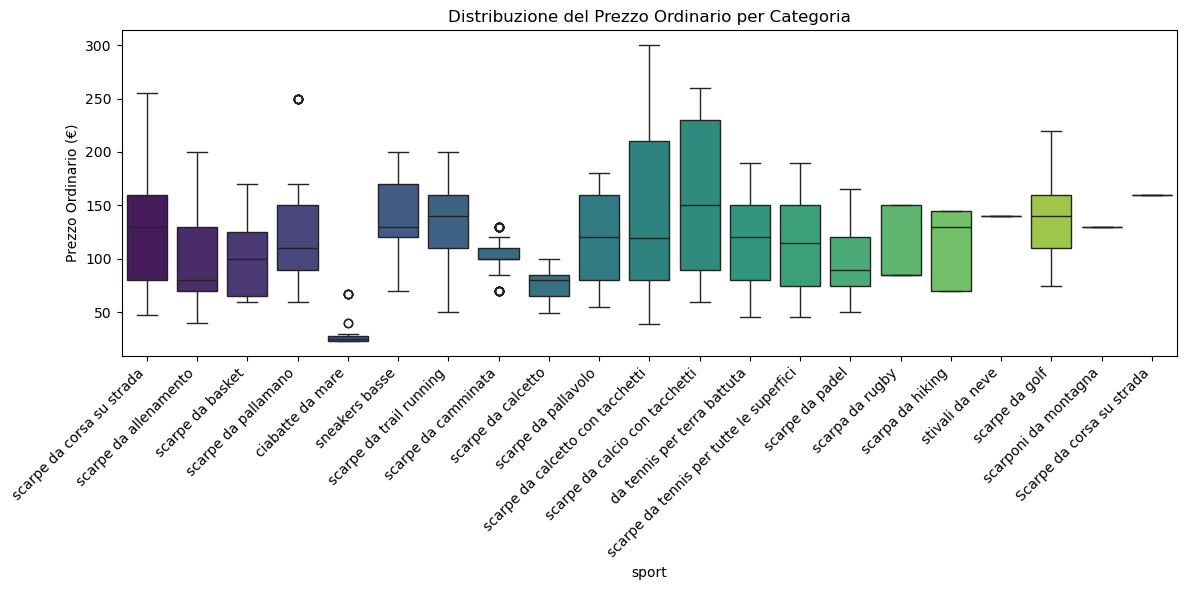

In [172]:
# Creazione del box plot per il prezzo effettivo per categoria
plt.figure(figsize=(12, 6))
sns.boxplot(x='sport', y='prezzo_ordinario', data=df, palette='viridis', hue='sport', legend=False)

# Aggiunta di etichette e titolo
plt.xlabel('sport')
plt.ylabel('Prezzo Effettivo (€)')
plt.title('Distribuzione del Prezzo Effettivo per Sport')
plt.xticks(rotation=45, ha='right') # Ruota le etichette sull'asse x per leggibilità
plt.tight_layout()
plt.show()

# Creazione del box plot per il prezzo ordinario per categoria
plt.figure(figsize=(12, 6))
sns.boxplot(x='sport', y='prezzo_ordinario', data=df, palette='viridis', hue='sport', legend=False)

# Aggiunta di etichette e titolo
plt.xlabel('sport')
plt.ylabel('Prezzo Ordinario (€)')
plt.title('Distribuzione del Prezzo Ordinario per Categoria')
plt.xticks(rotation=45, ha='right') # Ruota le etichette sull'asse x per leggibilità
plt.tight_layout()
plt.show()



### Analisi dei prezzi per comprendere la distribuzione generale dei prezzi di tutti i prodotti. 
### La scelta e di utilizzare un istogramma che e ottima per visualizzare i dati sui prezzi

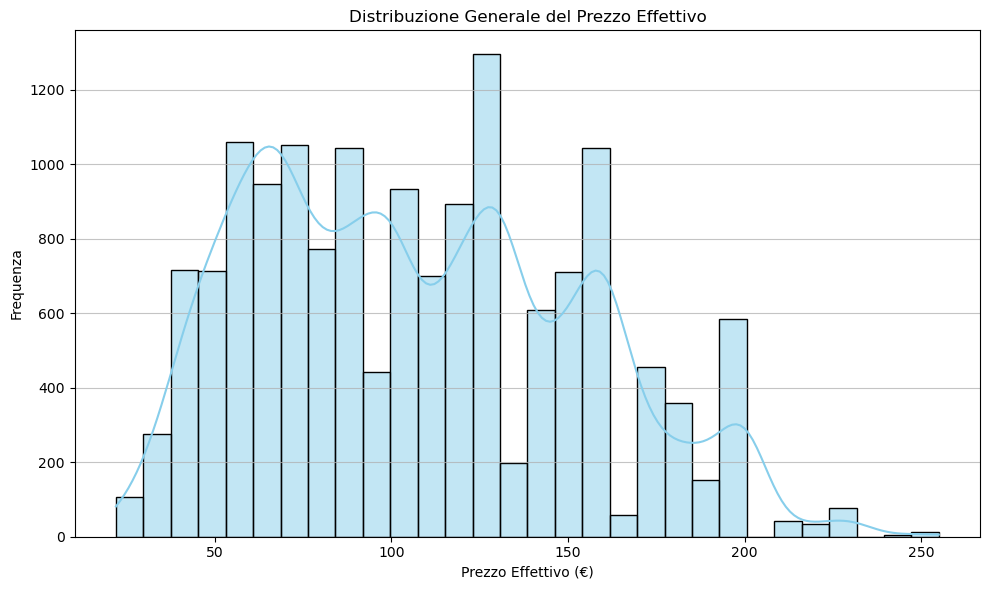

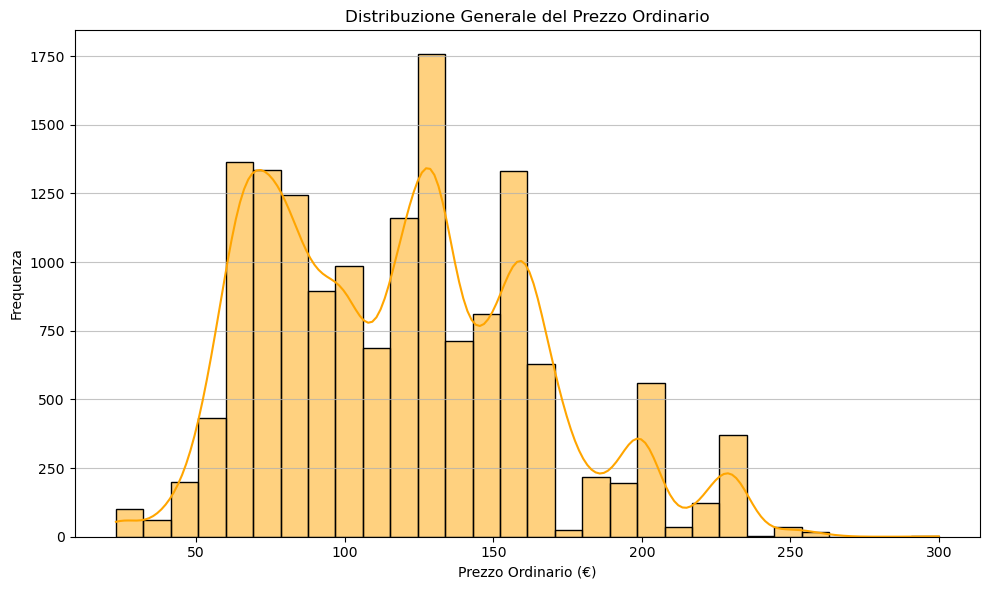

In [174]:
# Creazione dell'istogramma per il prezzo effettivo
plt.figure(figsize=(10, 6))
sns.histplot(df['prezzo_effettivo'], bins=30, kde=True, color='skyblue')

# Aggiunta di etichette e titolo
plt.xlabel('Prezzo Effettivo (€)')
plt.ylabel('Frequenza')
plt.title('Distribuzione Generale del Prezzo Effettivo')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

# Creazione dell'istogramma per il prezzo ordinario
plt.figure(figsize=(10, 6))
sns.histplot(df['prezzo_ordinario'], bins=30, kde=True, color='orange')

# Aggiunta di etichette e titolo
plt.xlabel('Prezzo Ordinario (€)')
plt.ylabel('Frequenza') # il numero di prodotti che hanno un prezzo all'interno di quell'intervallo
plt.title('Distribuzione Generale del Prezzo Ordinario')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

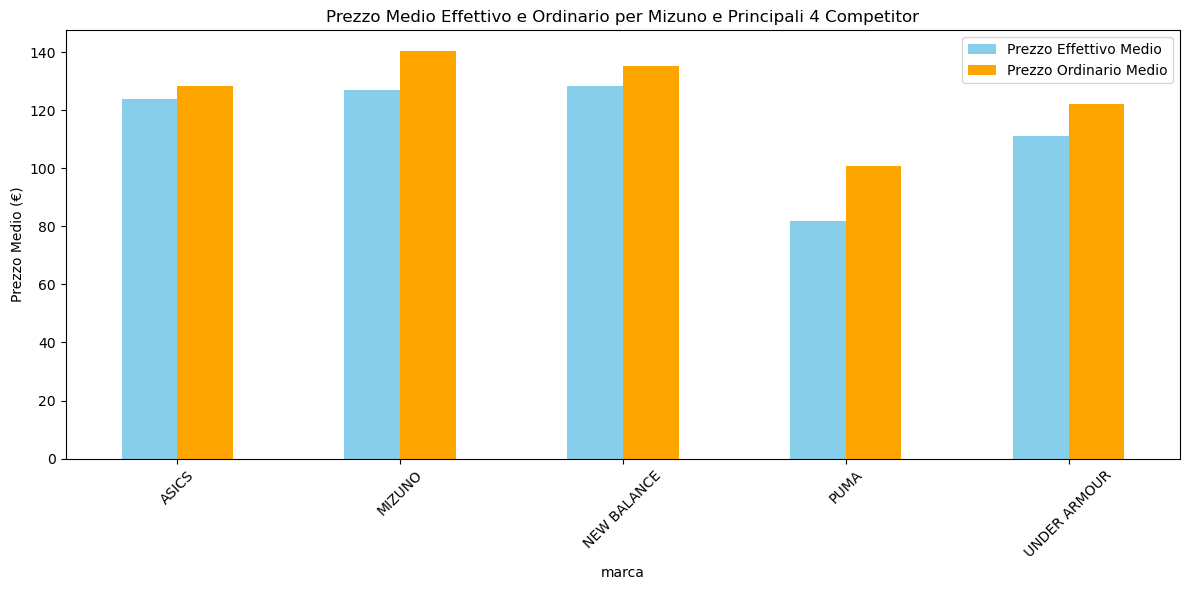

In [180]:
brand = 'MIZUNO'

# Identifica i principali 4 competitor in base al numero di modelli offerti
modelli_per_marca = df['marca'].value_counts().drop(brand, errors='ignore')
top_4_competitori = modelli_per_marca.nlargest(4).index.tolist()

# Lista delle marche da analizzare
marche_da_analizzare = [brand] + top_4_competitori

# Filtra il DataFrame per le marche selezionate
df_marche = df[df['marca'].isin(marche_da_analizzare)]

# Calcola il prezzo medio effettivo e ordinario per ogni marca
prezzi_medi_per_marca = df_marche.groupby('marca').agg(
    prezzo_effettivo_medio=('prezzo_effettivo', 'mean'),
    prezzo_ordinario_medio=('prezzo_ordinario', 'mean')
).reset_index()

# Imposta la marca come indice per facilitare il plotting
prezzi_medi_per_marca = prezzi_medi_per_marca.set_index('marca')

# Crea il grafico a barre affiancate
ax = prezzi_medi_per_marca[['prezzo_effettivo_medio', 'prezzo_ordinario_medio']].plot(
    kind='bar',
    figsize=(12, 6),
    color=['skyblue', 'orange'],
    rot=45
)

# Aggiungi etichette e titolo
plt.ylabel('Prezzo Medio (€)')
plt.title('Prezzo Medio Effettivo e Ordinario per Mizuno e Principali 4 Competitor')
plt.legend(['Prezzo Effettivo Medio', 'Prezzo Ordinario Medio'])
plt.tight_layout()
plt.show()

### Analisi dei prezzi Minimi, Massimi e Medi per Modello con l'aiuto di un grafico a barre raggruppante per poter visualizzare le differenze e le tendenze dei prezzi tra le diverse modelli

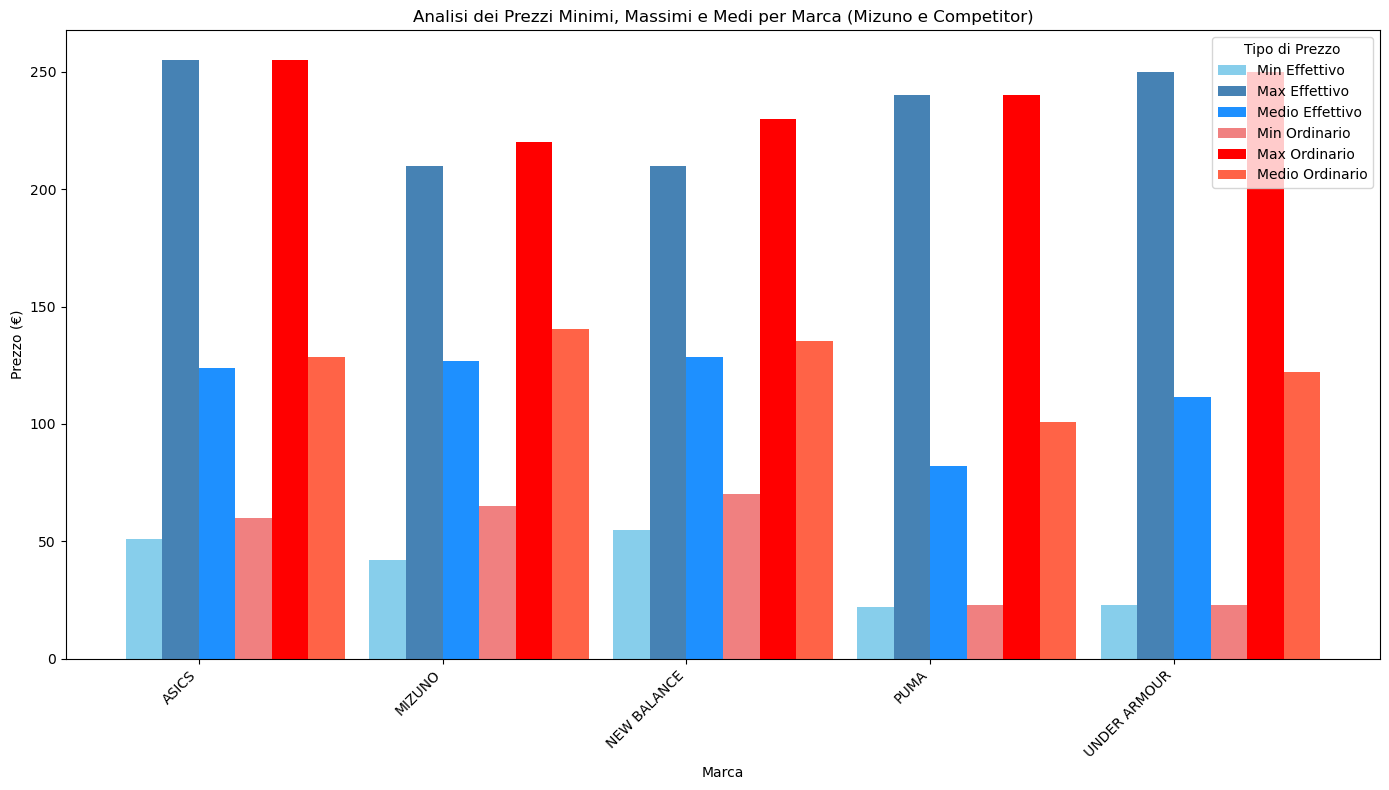

In [182]:
brand = 'MIZUNO'

# Identifica i principali 4 competitor in base al numero di modelli offerti
modelli_per_marca = df['marca'].value_counts().drop(brand, errors='ignore')
top_4_competitori = modelli_per_marca.nlargest(4).index.tolist()

# Lista delle marche da analizzare
marche_da_analizzare = [brand] + top_4_competitori

# Filtra il DataFrame per le marche selezionate
df_marche = df[df['marca'].isin(marche_da_analizzare)]

# Calcolo delle statistiche di prezzo per marca
prezzi_marca = df_marche.groupby('marca').agg(
    prezzo_minimo_effettivo=('prezzo_effettivo', 'min'),
    prezzo_massimo_effettivo=('prezzo_effettivo', 'max'),
    prezzo_medio_effettivo=('prezzo_effettivo', 'mean'),
    prezzo_minimo_ordinario=('prezzo_ordinario', 'min'),
    prezzo_massimo_ordinario=('prezzo_ordinario', 'max'),
    prezzo_medio_ordinario=('prezzo_ordinario', 'mean')
).reset_index()

# Impostazione delle dimensioni del grafico
plt.figure(figsize=(14, 8))

# Larghezza delle barre
bar_width = 0.15

# Posizioni delle barre per ciascuna statistica di prezzo
pos_marca = np.arange(len(prezzi_marca))
pos_min_eff = [p - bar_width * 1.5 for p in pos_marca]
pos_max_eff = [p - bar_width * 0.5 for p in pos_marca]
pos_med_eff = [p + bar_width * 0.5 for p in pos_marca]
pos_min_ord = [p + bar_width * 1.5 for p in pos_marca]
pos_max_ord = [p + bar_width * 2.5 for p in pos_marca]
pos_med_ord = [p + bar_width * 3.5 for p in pos_marca]

# Creazione delle barre per il prezzo effettivo
plt.bar(pos_min_eff, prezzi_marca['prezzo_minimo_effettivo'], bar_width, label='Min Effettivo', color='skyblue')
plt.bar(pos_max_eff, prezzi_marca['prezzo_massimo_effettivo'], bar_width, label='Max Effettivo', color='steelblue')
plt.bar(pos_med_eff, prezzi_marca['prezzo_medio_effettivo'], bar_width, label='Medio Effettivo', color='dodgerblue')

# Creazione delle barre per il prezzo ordinario
plt.bar(pos_min_ord, prezzi_marca['prezzo_minimo_ordinario'], bar_width, label='Min Ordinario', color='lightcoral')
plt.bar(pos_max_ord, prezzi_marca['prezzo_massimo_ordinario'], bar_width, label='Max Ordinario', color='red')
plt.bar(pos_med_ord, prezzi_marca['prezzo_medio_ordinario'], bar_width, label='Medio Ordinario', color='tomato')

# Aggiunta di etichette e titolo
plt.xlabel('Marca')
plt.ylabel('Prezzo (€)')
plt.title('Analisi dei Prezzi Minimi, Massimi e Medi per Marca (Mizuno e Competitor)')
plt.xticks(pos_marca, prezzi_marca['marca'], rotation=45, ha='right')
plt.legend(title='Tipo di Prezzo')
plt.tight_layout()
plt.show()

In [72]:
df

,Unnamed: 0,categoria,marca,nome_prodotto,prezzo_effettivo,prezzo_ordinario,url_prodotto,modello,sport,colori
0,0,Scarpini Sportivi Under Armour,UNDER ARMOUR,CHARGED COMMIT TR 4 - Scarpe da allenamento - ...,67.99,79.99,https://www.zalando.it/under-armour-charged-co...,CHARGED COMMIT TR 4,Scarpe da allenamento,black
1,1,Scarpini Sportivi Under Armour,UNDER ARMOUR,REIGN 6 - Scarpe da allenamento - anthracite/b...,118.99,139.99,https://www.zalando.it/under-armour-tribase-re...,REIGN 6,Scarpe da allenamento,anthracite/black/steel
2,2,Scarpini Sportivi Under Armour,UNDER ARMOUR,REIGN 6 - Scarpe da allenamento - black,139.99,139.99,https://www.zalando.it/under-armour-tribase-re...,REIGN 6,Scarpe da allenamento,black
3,3,Scarpini Sportivi Under Armour,UNDER ARMOUR,COURT 96 - Scarpe da allenamento - black,69.99,99.99,https://www.zalando.it/under-armour-sport-cour...,COURT 96,Scarpe da allenamento,black
4,4,Scarpini Sportivi Under Armour,UNDER ARMOUR,PHANTOM 4 UNISEX - Scarpe da corsa su strada -...,130.00,130.00,https://www.zalando.it/under-armour-scarpe-da-...,PHANTOM 4 UNISEX,Scarpe da corsa su strada,black
...,...,...,...,...,...,...,...,...,...,...
189,189,Scarpini Sportivi Under Armour,UNDER ARMOUR,Scarpe da corsa su strada - white distant gray...,95.97,160.00,https://www.zalando.it/under-armour-scarpe-run...,Unknown,Scarpe da corsa su strada,white distant gray halo gray
190,190,Scarpini Sportivi Under Armour,UNDER ARMOUR,Scarpe da corsa su strada - white,95.97,160.00,https://www.zalando.it/under-armour-scarpe-run...,Unknown,Scarpe da corsa su strada,white
191,191,Scarpini Sportivi Under Armour,UNDER ARMOUR,Scarpe da allenamento - grn vert,48.75,48.75,https://www.zalando.it/under-armour-sneakers-b...,Unknown,Scarpe da allenamento,grn vert
192,192,Scarpini Sportivi Under Armour,UNDER ARMOUR,Scarpe da camminata - black,100.00,100.00,https://www.zalando.it/under-armour-scarpe-run...,Unknown,Scarpe da camminata,black
